In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data_rides= pd.read_csv("files/rides.csv", sep=",")
data_rides.head(8)

,Id,Start Date,End Date,Start Location,Start District,End Location,End District,Distance,Promo
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,Шевченко,Юго-Восточный,Майская,Октябрьский,4069.0,0
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,Чехова,заречный,Спортивная,октябрьский,4515.0,0
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,Буденного,Октябрьский,Суворова,ленинский,4520.0,0
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,Труда,Центральный,Рабочая,Северо-Западный,3881.0,0
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,Первомайская,Северо-Западный,Юбилейная,Юго-Восточный,4029.0,0
5,100345,2023-04-22 09:10:09,2023-04-22 09:49:56,Лесная,Юго-Восточный,Западная,Ленинский,4879.0,0
6,100346,2023-04-22 09:15:12,2023-04-22 09:26:01,Пролетарская,Центральный,Свободы,Ленинский,1846.0,0
7,100347,2023-04-22 09:19:13,2023-04-22 09:40:03,Комарова,Ленинский,ул. западная,Ленинский,3133.0,0


In [7]:
for i in data_rides.columns:
    data_rides = data_rides.rename(columns={i: i.lower().replace(" ", "_")})

In [8]:
data_rides.columns

Index(['id', 'start_date', 'end_date', 'start_location', 'start_district',
       'end_location', 'end_district', 'distance', 'promo'],
      dtype='object')

In [10]:
data_rides['start_date'] = pd.to_datetime(data_rides['start_date']) 
data_rides['end_date'] = pd.to_datetime(data_rides['end_date']) 
data_rides = data_rides.astype({"distance" : float, "promo": bool})
data_rides.head(8)

,id,start_date,end_date,start_location,start_district,end_location,end_district,distance,promo
0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,Шевченко,Юго-Восточный,Майская,Октябрьский,4069.0,False
1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,Чехова,заречный,Спортивная,октябрьский,4515.0,False
2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,Буденного,Октябрьский,Суворова,ленинский,4520.0,False
3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,Труда,Центральный,Рабочая,Северо-Западный,3881.0,False
4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,Первомайская,Северо-Западный,Юбилейная,Юго-Восточный,4029.0,False
5,100345,2023-04-22 09:10:09,2023-04-22 09:49:56,Лесная,Юго-Восточный,Западная,Ленинский,4879.0,False
6,100346,2023-04-22 09:15:12,2023-04-22 09:26:01,Пролетарская,Центральный,Свободы,Ленинский,1846.0,False
7,100347,2023-04-22 09:19:13,2023-04-22 09:40:03,Комарова,Ленинский,ул. западная,Ленинский,3133.0,False


In [21]:
data_rides = data_rides.drop_duplicates()
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97372 entries, 0 to 102254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              97372 non-null  int64         
 1   start_date      97372 non-null  datetime64[ns]
 2   end_date        96817 non-null  datetime64[ns]
 3   start_location  97372 non-null  object        
 4   start_district  97372 non-null  object        
 5   end_location    97372 non-null  object        
 6   end_district    97372 non-null  object        
 7   distance        96191 non-null  float64       
 8   promo           97372 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 6.8+ MB


In [24]:
Q1 = data_rides['distance'].quantile(0.25)
Q3 = data_rides['distance'].quantile(0.75)
IQR = Q3 - Q1

# Условия для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Проверка выбросов
outliers = data_rides[(data_rides['distance'] < lower_bound) | (data_rides['distance'] > upper_bound)]
print(f'Количество выбросов: {outliers.shape[0]}')

Количество выбросов: 4700


In [25]:
# Замена выбросов на медиану
median_distance = data_rides['distance'].median()
data.loc[data_rides['distance'] < lower_bound, 'distance'] = median_distance
data.loc[data_rides['distance'] > upper_bound, 'distance'] = median_distance

# Проверка на пропуски
missing_values = data_rides.isnull().sum()
print(f'Пропуски в данных:\n{missing_values}')

# Заполнение пропусков (если есть)
data_rides['distance'].fillna(median_distance, inplace=True)

Пропуски в данных:
id                   0
start_date           0
end_date           555
start_location       0
start_district       0
end_location         0
end_district         0
distance          1181
promo                0
dtype: int64


In [28]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97372 entries, 0 to 102254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              97372 non-null  int64         
 1   start_date      97372 non-null  datetime64[ns]
 2   end_date        96817 non-null  datetime64[ns]
 3   start_location  97372 non-null  object        
 4   start_district  97372 non-null  object        
 5   end_location    97372 non-null  object        
 6   end_district    97372 non-null  object        
 7   distance        97372 non-null  float64       
 8   promo           97372 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 6.8+ MB


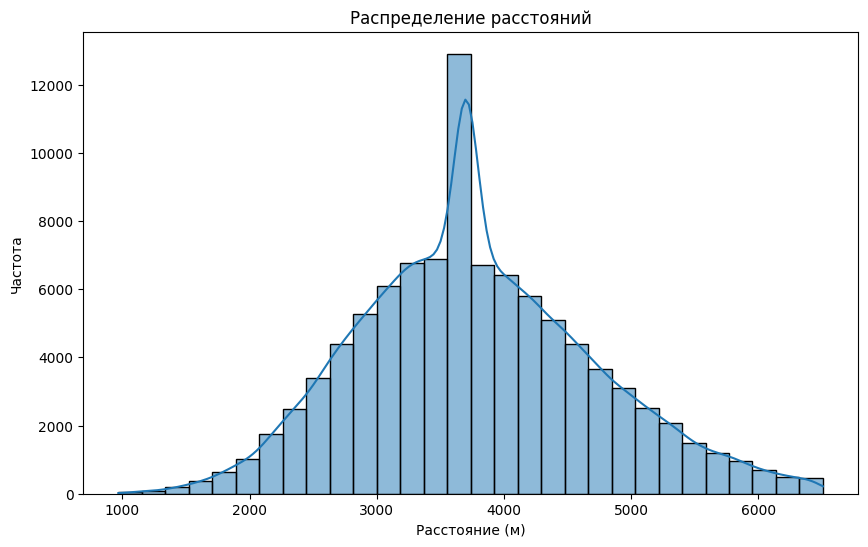

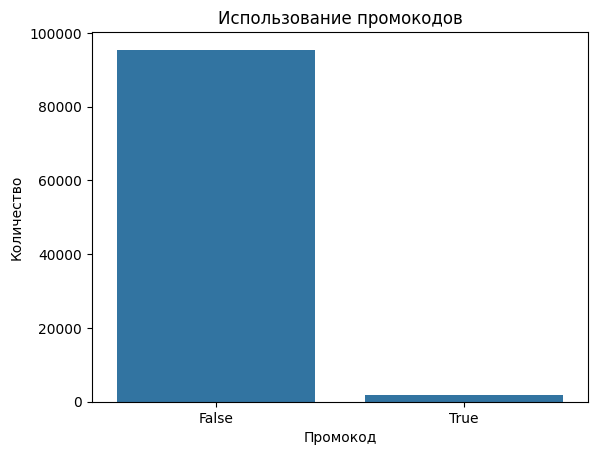

In [26]:
# График распределения расстояний
plt.figure(figsize=(10, 6))
sns.histplot(data['distance'], bins=30, kde=True)
plt.title('Распределение расстояний')
plt.xlabel('Расстояние (м)')
plt.ylabel('Частота')
plt.show()

# Анализ промокодов
promo_counts = data['promo'].value_counts()
sns.barplot(x=promo_counts.index, y=promo_counts.values)
plt.title('Использование промокодов')
plt.xlabel('Промокод')
plt.ylabel('Количество')
plt.show()